# Importing Appropriate Modules 

In [202]:
from parcels import FieldSet, ParticleSet, Variable, JITParticle, AdvectionRK4, ErrorCode, plotTrajectoriesFile
import numpy as np
import math
from datetime import timedelta
from operator import attrgetter
import netCDF4
import pandas
import os
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm


# Defining the Files that are needed to Run Parcels

Globfiles = This is the exact files that the synthetic particle tracker will use from GlobCurrent. It then uses files from 20080101 to 20080110 for example to run the synthetic particle tracker. This allows for the correct time period to be used during comparisons.

In [8]:
dates = [datetime(2008, 1, 1) + timedelta(days=x) for x in range(0, 10)]

globfiles = ["GlobCurrent_Daily/" + x.strftime("%Y%m%d") + "-GLOBCURRENT-L4-CUReul_15m-ALT_SUM-v03.0-fv01.0.nc" for x in dates]

In this case, it is important to take note of the exact version of GlobCurrent (v1,v2 or v3) that one is using. This will result in a different file name in the section as follows "-GLOBCURRENT-L4-CUReul_15m-ALT_SUM-v03.0-fv01.0.nc". Furthermore, it is also important to make sure you are using daily instead of 3-hourly as this will also affect the file name.

# Telling Parcels which files to use to force the synthetic particles

In [9]:
filenames = {'U': globfiles,
             'V': globfiles}

variables = {'U': 'eastward_eulerian_current_velocity',
             'V': 'northward_eulerian_current_velocity'}
dimensions = {'lat': 'lat',
              'lon': 'lon',
              'time': 'time'}

These dimensions are specific to GlobCurrent input data. This will obviously vary if a different ocean product or model is being used to run parcels. 

In [208]:
fieldset = FieldSet.from_netcdf(filenames, variables, dimensions, allow_time_extrapolation=True)

lonW = 10  #western part of deployment box
lonE = 15  #eastern part of deployment box
latS = -40 #southern part of deployment box
latN = -30 #northern part of deployment box
particles = 10 #number of particles one wants to deploy

lons, lats = np.meshgrid(np.arange(lonW, lonE, 1), np.arange(latS, latN,1))
pset = ParticleSet.from_list(fieldset=fieldset, pclass=JITParticle, lon=lons, lat=lats)


INFO: Compiled JITParticleAdvectionRK4 ==> /var/folders/r4/54mc4t2559d_d1fnkl99m38r0000gn/T/parcels-501/27805ff3aa34ba12ddb373f3f2cb1d1b.so


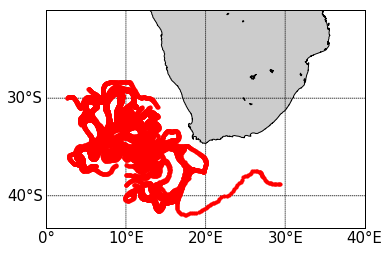

In [209]:
os.remove("testing3.nc")
output_file = pset.ParticleFile(name="testing3")
pset.execute(AdvectionRK4, starttime=datetime(2008, 1, 1), runtime=timedelta(days=70),
             dt=timedelta(minutes=5), interval=timedelta(hours=6),output_file=output_file)

nc = netCDF4.Dataset("testing3.nc")
lon = nc.variables["lon"][:]
lat = nc.variables["lat"][:]


m = Basemap(projection = "merc", resolution="i",llcrnrlon = 0, 
            llcrnrlat = -43, urcrnrlon = 40, urcrnrlat = -20,lat_0= -20,lon_0 = 0)
f1,f2 = m(lon,lat)
m.scatter(f1,f2,10,color="red", marker = "o", alpha = 1, zorder=3)

#Blue=GC
#Red = Hycom

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
#m.bluemarble()
m.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=15)

plt.show()

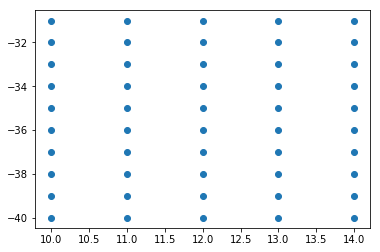

array([[10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14],
       [10, 11, 12, 13, 14]])

In [192]:
plt.scatter(lons,lats)
plt.show()

lons

In [144]:
parallels = np.arange(np.floor(latS),np.ceil(latN),1)
meridians = np.arange(np.floor(lonW),np.ceil(lonE),1)

In [147]:
grid = np.meshgrid(meridians,parallels)

0.0